# EKSPLORASI DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb

In [2]:
data = pd.read_csv('nba_new.csv')
data.head()

FileNotFoundError: File b'nba_new.csv' does not exist

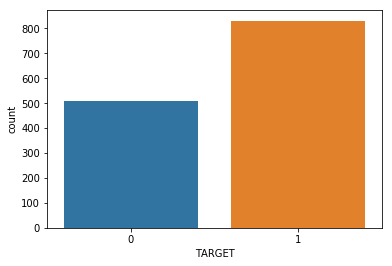

In [3]:
sns.countplot(x=data['TARGET'])
plt.show()

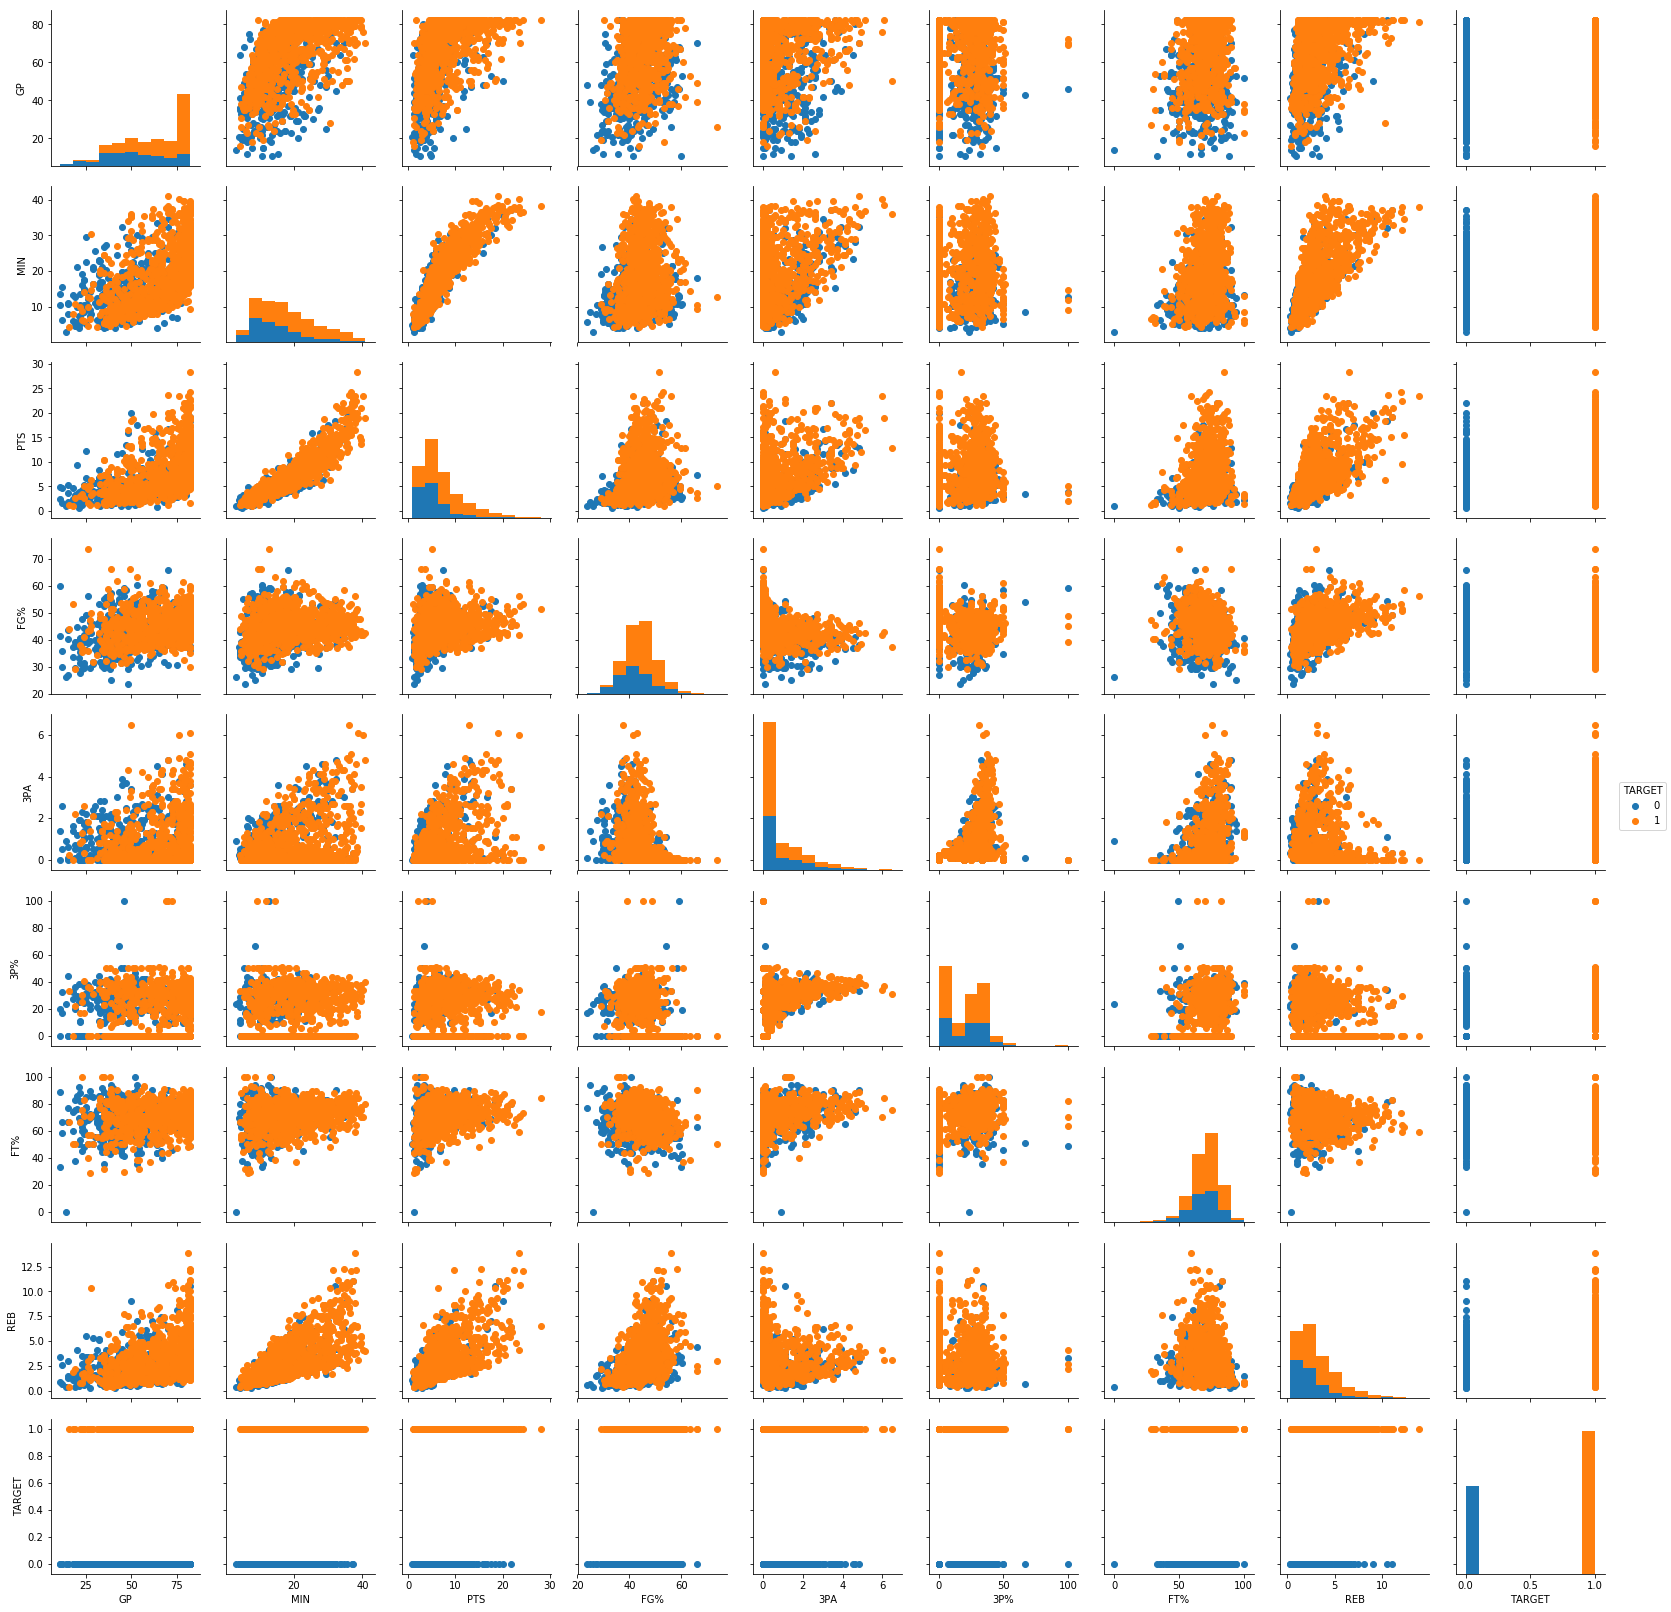

In [4]:
g = sns.PairGrid(data, hue="TARGET")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

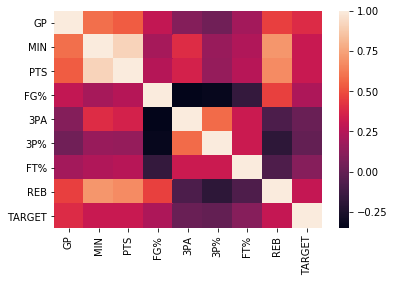

In [5]:
sb.heatmap(data.corr())

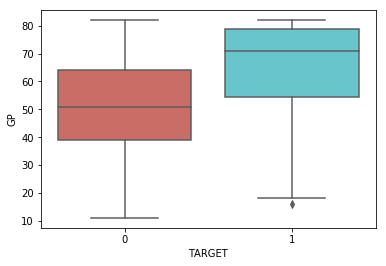

In [6]:
sb.boxplot(x='TARGET', y='GP', data=data, palette='hls')

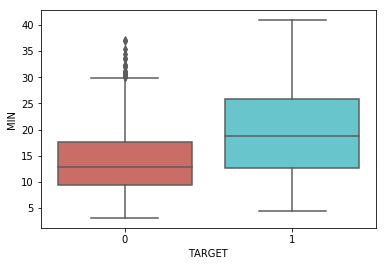

In [7]:
sb.boxplot(x='TARGET', y='MIN', data=data, palette='hls')

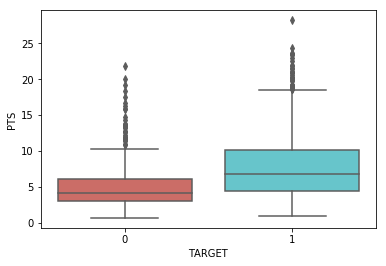

In [8]:
sb.boxplot(x='TARGET', y='PTS', data=data, palette='hls')

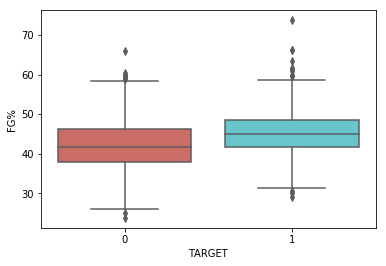

In [9]:
sb.boxplot(x='TARGET', y='FG%', data=data, palette='hls')

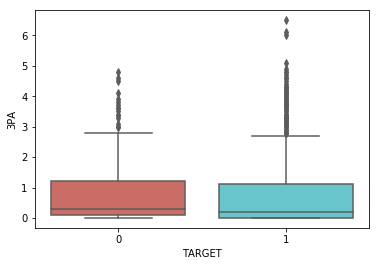

In [10]:
sb.boxplot(x='TARGET', y='3PA', data=data, palette='hls')

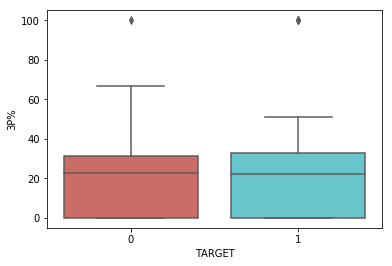

In [11]:
sb.boxplot(x='TARGET', y='3P%', data=data, palette='hls')

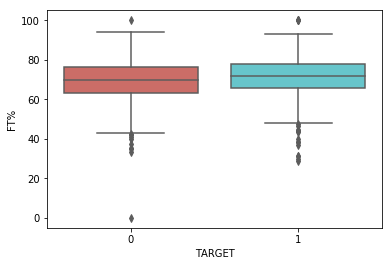

In [12]:
sb.boxplot(x='TARGET', y='FT%', data=data, palette='hls')

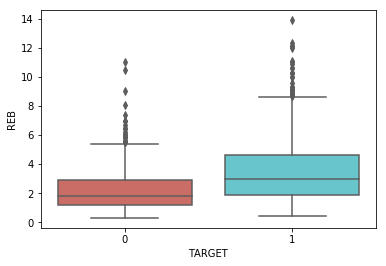

In [13]:
sb.boxplot(x='TARGET', y='REB', data=data, palette='hls')

In [14]:
data.describe()

,GP,MIN,PTS,FG%,3PA,3P%,FT%,REB,TARGET
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,44.169403,0.779179,19.308126,70.300299,3.034478,0.620149
std,17.433992,8.307964,4.357545,6.137679,1.061847,15.956966,10.578479,2.057774,0.485531
min,11.000000,3.100000,0.700000,23.800000,0.000000,0.000000,0.000000,0.300000,0.000000
25%,47.000000,10.875000,3.700000,40.200000,0.000000,0.000000,64.700000,1.500000,0.000000
50%,63.000000,16.100000,5.550000,44.100000,0.300000,22.200000,71.250000,2.500000,1.000000
75%,77.000000,22.900000,8.800000,47.900000,1.200000,32.500000,77.600000,4.000000,1.000000
max,82.000000,40.900000,28.200000,73.700000,6.500000,100.000000,100.000000,13.900000,1.000000


# METODE STATISTIKA

# REGLOG BINER

In [15]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
dataset = pd.read_csv("nba_new.csv")
dataset.head()

,GP,MIN,PTS,FG%,3PA,3P%,FT%,REB,TARGET
0,36,27.4,7.4,34.7,2.1,25.0,69.9,4.1,0
1,35,26.9,7.2,29.6,2.8,23.5,76.5,2.4,0
2,74,15.3,5.2,42.2,1.7,24.4,67.0,2.2,0
3,58,11.6,5.7,42.6,0.5,22.6,68.9,1.9,1
4,48,11.5,4.5,52.4,0.1,0.0,67.4,2.5,1


In [17]:
dataset.shape

(1340, 9)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 9 columns):
GP        1340 non-null int64
MIN       1340 non-null float64
PTS       1340 non-null float64
FG%       1340 non-null float64
3PA       1340 non-null float64
3P%       1340 non-null float64
FT%       1340 non-null float64
REB       1340 non-null float64
TARGET    1340 non-null int64
dtypes: float64(7), int64(2)
memory usage: 94.3 KB


In [19]:
x = dataset.iloc[:,0:8].values
print(x)

[[36.  27.4  7.4 ... 25.  69.9  4.1]
 [35.  26.9  7.2 ... 23.5 76.5  2.4]
 [74.  15.3  5.2 ... 24.4 67.   2.2]
 ...
 [43.  12.1  5.4 ...  0.  64.3  3.8]
 [52.  12.   4.5 ... 10.  62.5  0.7]
 [47.  11.7  4.4 ... 33.3 67.3  0.9]]


In [20]:
y= dataset.iloc[:,8].values
print(y)

[0 0 0 ... 0 1 1]


In [21]:
# Split the data into Training and Testing set
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
#Fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1], dtype=int64)

In [24]:
# Making the confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 62,  56],
       [ 25, 125]], dtype=int64)

In [25]:
from sklearn import metrics
print (metrics.accuracy_score(y_test,classifier.predict(x_test)))

0.6977611940298507


In [26]:
total=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.6977611940298507
Sensitivity :  0.5254237288135594
Specificity :  0.8333333333333334


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, auc, roc_curve

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
print('auc =', auc)

auc = 0.6793785310734464


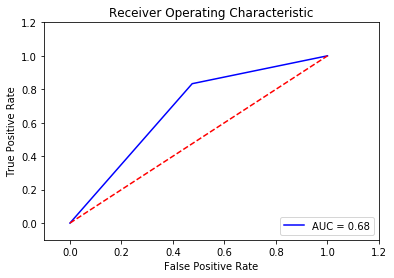

In [29]:
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# MACHINE LEARNING

# NAIVE BAYES

In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() 

In [31]:
x_train.shape, y_train.shape

((1072, 8), (1072,))

In [32]:
x_test.shape, y_test.shape

((268, 8), (268,))

In [33]:
gnb = GaussianNB().fit(x_train, y_train) 
gnb_predictions = gnb.predict(x_test) 

In [34]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, gnb_predictions)
print('Confusion Matrix : \n', cm1)

Confusion Matrix : 
 [[ 85  33]
 [ 47 103]]


In [35]:
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.7014925373134329
Sensitivity :  0.5254237288135594
Specificity :  0.6866666666666666


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, auc, roc_curve

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, gnb_predictions)
auc = auc(fpr, tpr)
print('auc =', auc)

auc = 0.703502824858757


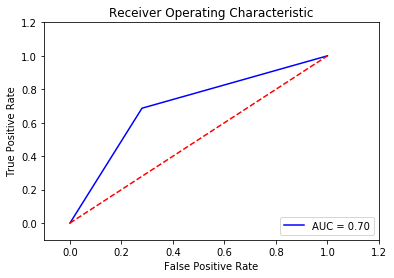

In [38]:
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# DECISION TREE

In [39]:
import pydotplus
from sklearn import tree
import collections
import graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [40]:
data_feature_names=['GP','MIN','PTS','FG%','3PA','3P%','FT%','REB']
print(data_feature_names)

['GP', 'MIN', 'PTS', 'FG%', '3PA', '3P%', 'FT%', 'REB']


In [41]:
#Training
clf=tree.DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)

In [42]:
clfpredictions = clf.predict(x_test) 

In [43]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_test, clfpredictions)
print('Confusion Matrix : \n', cm2)

Confusion Matrix : 
 [[67 51]
 [51 99]]


In [44]:
total2=sum(sum(cm2))
#####from confusion matrix calculate accuracy
accuracy2=(cm2[0,0]+cm2[1,1])/total2
print ('Accuracy : ', accuracy2)

sensitivity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity2 )

specificity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity2)

Accuracy :  0.6194029850746269
Sensitivity :  0.5677966101694916
Specificity :  0.66


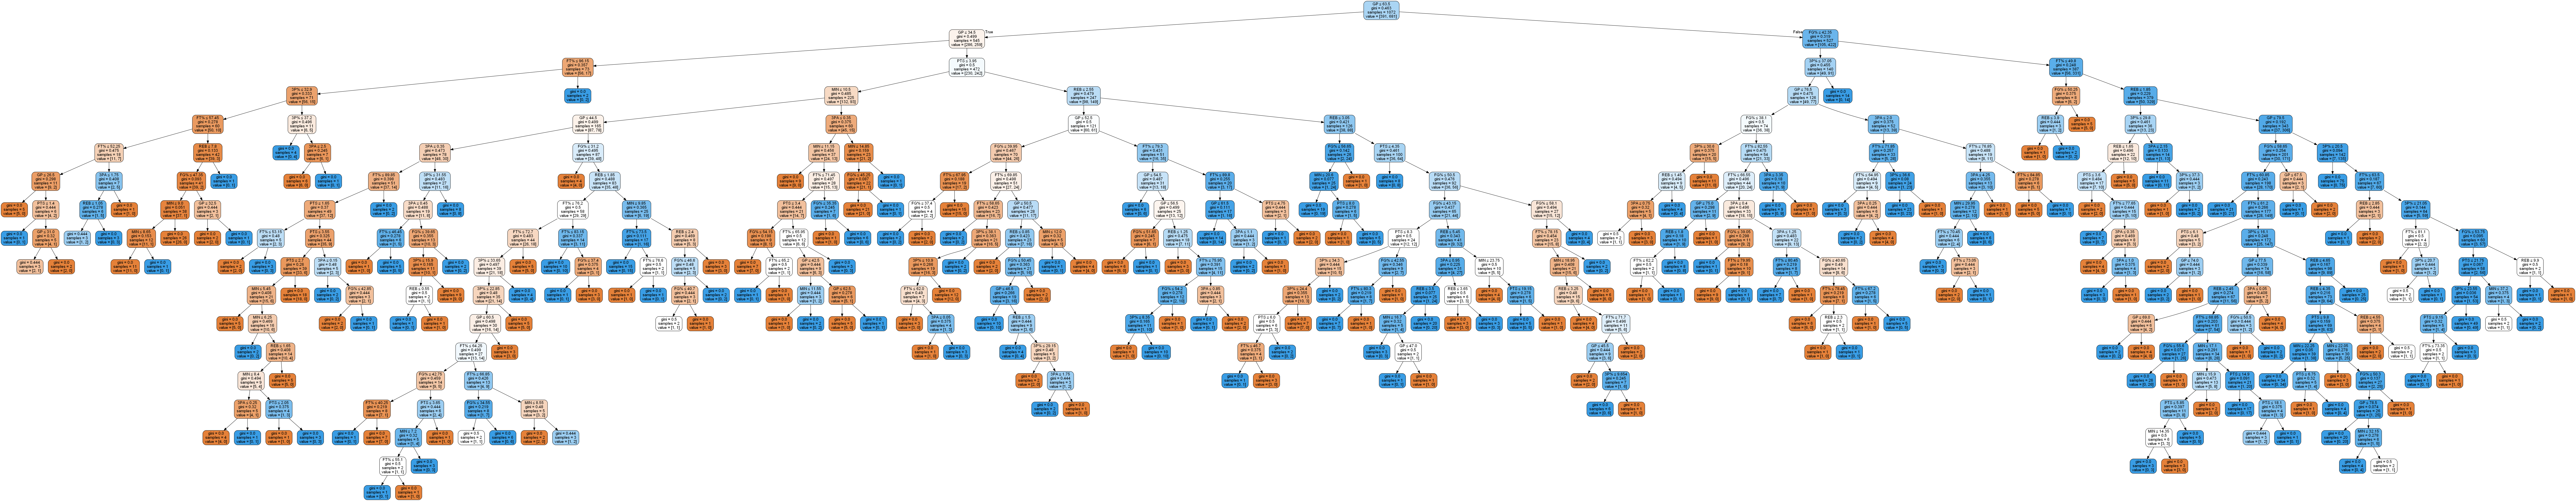

In [45]:
dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,feature_names=data_feature_names,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, auc, roc_curve

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, clfpredictions)
auc = auc(fpr, tpr)
print('auc =', auc)

auc = 0.6138983050847459


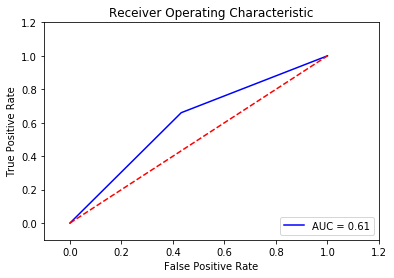

In [48]:
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# SVM

In [49]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [50]:
from sklearn import svm
clf = svm.SVC(class_weight=None,C=1,gamma=0.1,kernel='rbf',random_state=100).fit(x_train, y_train)
svm_predictions=clf.predict(x_test)

In [51]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_test, svm_predictions)
print('Confusion Matrix : \n', cm3)

Confusion Matrix : 
 [[  7 111]
 [  5 145]]


In [52]:
total3=sum(sum(cm3))
#####from confusion matrix calculate accuracy
accuracy3=(cm3[0,0]+cm3[1,1])/total3
print ('Accuracy : ', accuracy3)

sensitivity3 = cm3[0,0]/(cm3[0,0]+cm3[0,1])
print('Sensitivity : ', sensitivity )

specificity3 = cm3[1,1]/(cm3[1,0]+cm3[1,1])
print('Specificity : ', specificity3)

Accuracy :  0.5671641791044776
Sensitivity :  0.5254237288135594
Specificity :  0.9666666666666667


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, auc, roc_curve

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, svm_predictions)
auc = auc(fpr, tpr)
print('auc =', auc)

auc = 0.5129943502824859


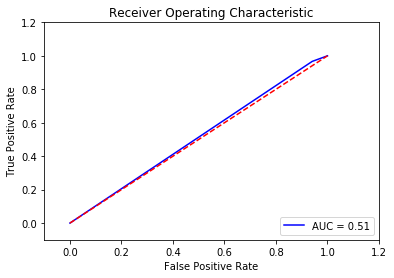

In [55]:
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# RANDOM FOREST

In [56]:
RF = RandomForestClassifier(random_state=123)
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [57]:
rf_pred=RF.predict(x_test)
rf_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1], dtype=int64)

In [58]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm4 = confusion_matrix(y_test, rf_pred)
print('Confusion Matrix : \n', cm4)

Confusion Matrix : 
 [[ 61  57]
 [ 39 111]]


In [59]:
total4=sum(sum(cm4))
#####from confusion matrix calculate accuracy
accuracy4=(cm4[0,0]+cm4[1,1])/total4
print ('Accuracy : ', accuracy4)

sensitivity4 = cm4[0,0]/(cm4[0,0]+cm4[0,1])
print('Sensitivity : ', sensitivity4 )

specificity4 = cm4[1,1]/(cm4[1,0]+cm4[1,1])
print('Specificity : ', specificity4)

Accuracy :  0.6417910447761194
Sensitivity :  0.5169491525423728
Specificity :  0.74


In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, auc, roc_curve

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, rf_pred)
auc = auc(fpr, tpr)
print('auc =', auc)

auc = 0.6284745762711863


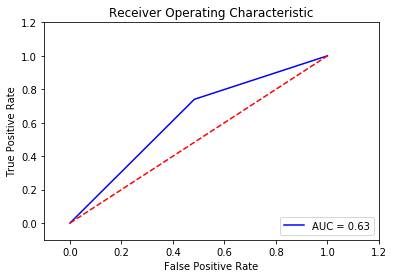

In [62]:
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()